In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string

In [2]:
def plotCountPlot(df, column, title, xlabel, ylabel, figsize=(10, 5), invert=False):
    '''
      Function to plot count plot for a given column in a dataframe
    '''
    plt.figure(figsize=figsize)
    if invert:
        sb.countplot(y=column, data=df)
    else:
      sb.countplot(x=column, data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

##### Loading the data

In [3]:
# Reading the data
df = pd.read_csv('complaints.csv')

/var/folders/3n/y6l_g9s960lc_759jvhdhxp40000gn/T/ipykernel_18036/3266650137.py:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


In [4]:
# Initial investiogation of the data
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",OK,74447.0,Servicemember,NaN,Web,2022-11-22,In progress,Yes,NaN,6231498
1,2022-11-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,NJ,7093.0,NaN,NaN,Web,2022-11-16,In progress,Yes,NaN,6205383
2,2022-11-09,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Genesis FS Card Services, Inc.",TX,75038.0,NaN,NaN,Web,2022-11-09,Closed with explanation,Yes,NaN,6182699
3,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NORTHERN OHIO INVESTMENT COMPANY,MO,63031.0,NaN,Other,Web,2022-11-08,Untimely response,No,NaN,6173945
4,2022-11-07,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"R & R Collection Service, Inc.",MO,64154.0,NaN,NaN,Phone,2022-11-07,Untimely response,No,NaN,6175998


In [5]:
print(df.shape)

(3096756, 18)


We read the data above. Now we rename the column names for our ease. 

In [6]:
'''Get list of all column names'''
col_list = df.columns.tolist()
# print(col_list)

''' Renaming the columns for ease of access'''
df = df.rename(columns={'Date received':'date_received', 'Product':'product', 'Sub-product':'sub_product', 'Issue':'issue', 'Sub-issue':'sub_issue', 'Consumer complaint narrative':'narrative', 'Company public response':'response_public', 'Company':'company', 'State':'state', 'ZIP code':'zip', 'Tags':'tags', 'Consumer consent provided?':'consent', 'Submitted via':'submitted_via', 'Date sent to company':'date_sent', 'Company response to consumer':'response_to_cust', 'Timely response?':'timely_resp', 'Consumer disputed?':'consumer_disputed', 'Complaint ID':'id'})
df.head()

,date_received,product,sub_product,issue,sub_issue,narrative,response_public,company,state,zip,tags,consent,submitted_via,date_sent,response_to_cust,timely_resp,consumer_disputed,id
0,2022-11-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",OK,74447.0,Servicemember,NaN,Web,2022-11-22,In progress,Yes,NaN,6231498
1,2022-11-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,NJ,7093.0,NaN,NaN,Web,2022-11-16,In progress,Yes,NaN,6205383
2,2022-11-09,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Genesis FS Card Services, Inc.",TX,75038.0,NaN,NaN,Web,2022-11-09,Closed with explanation,Yes,NaN,6182699
3,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NORTHERN OHIO INVESTMENT COMPANY,MO,63031.0,NaN,Other,Web,2022-11-08,Untimely response,No,NaN,6173945
4,2022-11-07,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"R & R Collection Service, Inc.",MO,64154.0,NaN,NaN,Phone,2022-11-07,Untimely response,No,NaN,6175998


Since the goal of this notebook is to see if we can perform product classification, we will now plot the product and sub-product columns to seee if that tells us something.

<AxesSubplot:xlabel='count', ylabel='product'>

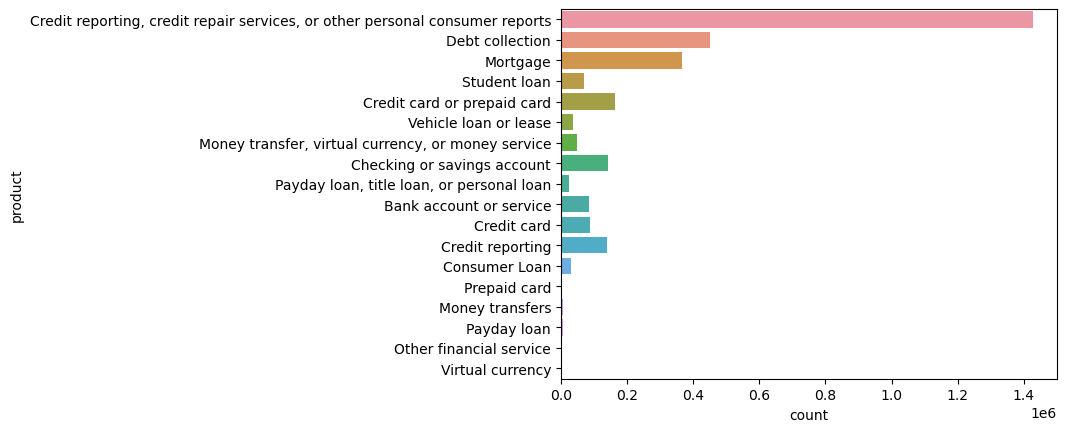

In [7]:
# Plotting the countplot for 'product' column
sb.countplot(data=df, y='product')

/var/folders/3n/y6l_g9s960lc_759jvhdhxp40000gn/T/ipykernel_18036/2320858898.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sb_plot.set_xticklabels(sb_plot.get_xticklabels(), rotation=40, ha="right")


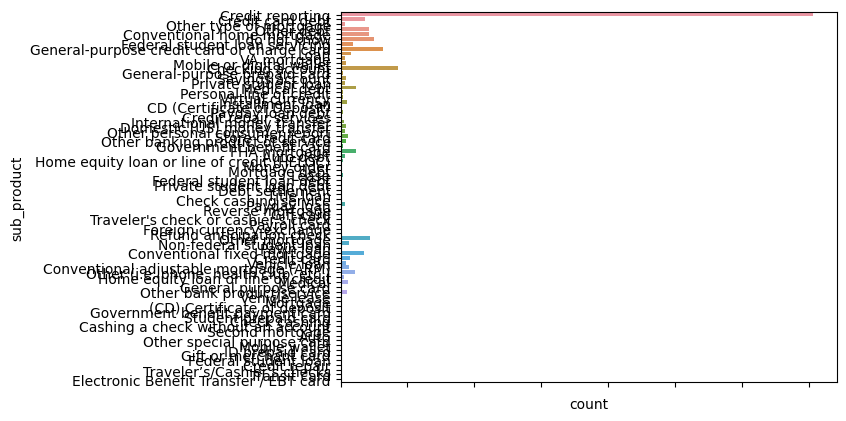

<Figure size 400x800 with 0 Axes>

In [8]:
# Plotting the countplot for 'sub_product' column
sb_plot = sb.countplot(data=df, y='sub_product')
plt.figure(figsize=(4,8))
sb_plot.set_xticklabels(sb_plot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


From the above plots, we can see the data is **highly imbalanced**.

* From the first graph, most of the data belongs to the "Credit reporting, credit repair services, or other personal consumer reports".
* From the second graph, most of the data belongs to the "Credit reporting" class. 

The second graph only tells us that the data is imbalance. But there are too many sub_product classes for our problem. So product classes are more comprehensible. 

We might have to drop some of the classes that are not required for our problem or the ones that have null values.

##### Extracting relevant columns for our problem

In [9]:
new_df = df[['product', 'sub_product', 'issue', 'sub_issue', 'narrative']]
new_df.head()

,product,sub_product,issue,sub_issue,narrative
0,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
1,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN
2,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN
3,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN


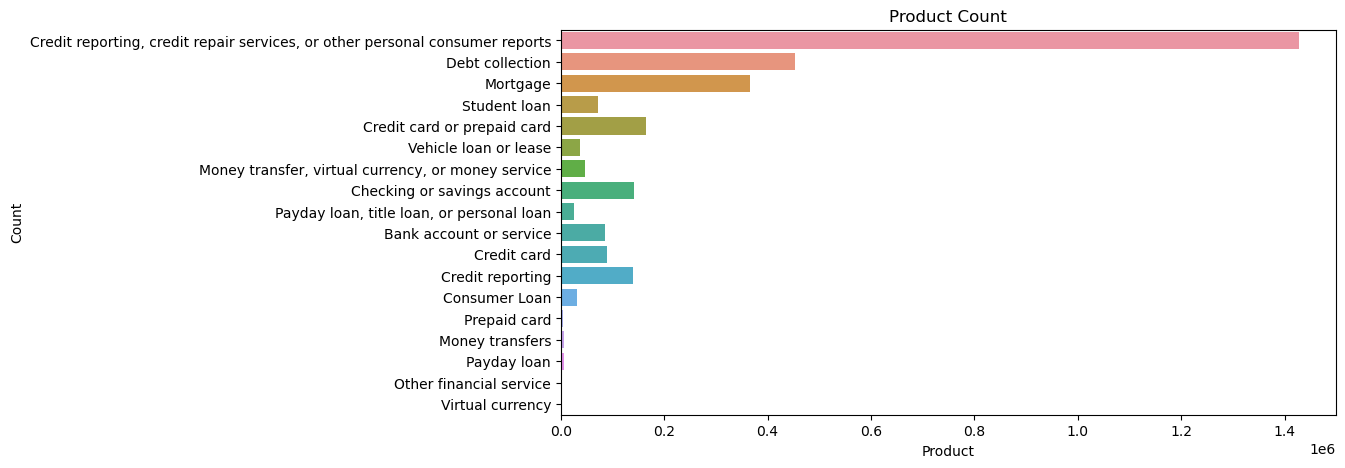

In [10]:
plotCountPlot(new_df, 'product', 'Product Count', 'Product', 'Count', invert=True)

In [11]:
# Getting the count of each product
new_df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    1427733
Debt collection                                                                  452370
Mortgage                                                                         365096
Credit card or prepaid card                                                      165248
Checking or savings account                                                      141706
Credit reporting                                                                 140430
Credit card                                                                       89190
Bank account or service                                                           86206
Student loan                                                                      71479
Money transfer, virtual currency, or money service                                47590
Vehicle loan or lease                                                             37116
Consumer Loan                   

In [12]:
# Getting the count of each sub product
new_df['sub_product'].value_counts()

Credit reporting                              1411527
Checking account                               171328
General-purpose credit card or charge card     125386
I do not know                                   98828
Other mortgage                                  86635
                                               ...   
Credit repair                                     102
Traveler’s/Cashier’s checks                        88
Transit card                                       37
Student prepaid card                               25
Electronic Benefit Transfer / EBT card             12
Name: sub_product, Length: 76, dtype: int64

In [13]:
# Getting count of issue
new_df['issue'].value_counts()

Incorrect information on your report                                                758841
Problem with a credit reporting company's investigation into an existing problem    383340
Improper use of your report                                                         261617
Attempts to collect debt not owed                                                   152657
Loan modification,collection,foreclosure                                            112309
                                                                                     ...  
Property was sold                                                                        9
Lender damaged or destroyed vehicle                                                      8
Lender sold the property                                                                 7
Property was damaged or destroyed property                                               6
Lender damaged or destroyed property                                                     3

In [14]:
# Getting count of sub issue
new_df['sub_issue'].value_counts()

Information belongs to someone else                                                 486247
Their investigation did not fix an error on your report                             205995
Reporting company used your report improperly                                       163025
Credit inquiries on your report that you don't recognize                             96059
Account status incorrect                                                             89359
                                                                                     ...  
Was signed up for overdraft on card, but don't want to be                                6
Insurance terms                                                                          6
Problem with a credit reporting company's investigation into an existing problem         3
Improper use of your report                                                              1
Credit monitoring or identity theft protection services                                  1

##### Analysis after seeing the counts:

There is surely a lot of data, but only 'product' seems to have enough data for training. All the other columns are highly imbalanced (even more than 'product') i.e. they have little to no data for some classes. 

Also for 'sub_product' there seems to be a large number of ambiguous data as there are classes like 'others', 'i don't know' and 'none'. If I decided to combine the 'product' and 'sub_product', then it might be a challenge as there would be overlaps.

#### Assessing Null Values

In [15]:
# List count of null values in each column
print("Count of null values in each column")
print(new_df.isnull().sum())
print("-----------------------")
# List count of all values minus null values in each column
print("Actual count of values in each column excluding null values")
print(new_df.count() - new_df.isnull().sum())

Count of null values in each column
product              0
sub_product     235294
issue                0
sub_issue       683153
narrative      1984336
dtype: int64
-----------------------
Actual count of values in each column excluding null values
product        3096756
sub_product    2626168
issue          3096756
sub_issue      1730450
narrative      -871916
dtype: int64


In [16]:
# Find the percentage of null values in each column
print("Percentage of null values in each column")
print(new_df.isnull().sum() / new_df.shape[0] * 100)

Percentage of null values in each column
product         0.000000
sub_product     7.598080
issue           0.000000
sub_issue      22.060279
narrative      64.077893
dtype: float64


In [17]:
new_df.shape

(3096756, 5)

What can we make out of this null values?

Since we are doing text classification, we obviously need text to perform the classification. Mostly the text should have been in the narrative section. But we can see from the above, 'narrative' has 64% of values as NaN.

Since there are 3096756 rows in our data, we can comfortably remove about 64% of our data and still have significant data left for training. 

##### Dropping the rows where narrative is Null

In [18]:
# Drop rows where narrative is null
new_df = new_df.dropna(subset=['narrative'])

In [19]:
new_df.shape

(1112420, 5)

In [20]:
# Find the percentage of null values in each column
print("Percentage of null values in each column")
print(new_df.isnull().sum() / new_df.shape[0] * 100)

Percentage of null values in each column
product         0.000000
sub_product     4.693191
issue           0.000000
sub_issue      17.482965
narrative       0.000000
dtype: float64


We still have null values, but the percentage of them has dropped significantly. Now the dataset seems to be workable.

##### Working with the text data

In [21]:
print(new_df.iloc[0])

product                                          Debt collection
sub_product                                           Other debt
issue                          Attempts to collect debt not owed
sub_issue                                          Debt was paid
narrative      XXXX. I do not owe any money to XXXX  XXXX. I ...
Name: 38, dtype: object


In [22]:
narrative_text = new_df['narrative'].iloc[0]
print(narrative_text)

XXXX. I do not owe any money to XXXX  XXXX. I have never received a bill from XXXX indicating a balance due. 
XXXX. I have never received a Demand Letter from XXXX indicating if the amount due is not paid by XXXX date, collection action will begin XXXX. My payments for service are up to date [ no money for service is due ] XXXX. I have returned all equipment to XXXX XXXX for which I received a receipt.!! 
XXXX. XXXX has previously contracted for this with XXXX XXXX XXXX XXXX XXXX, and the XXXX XXXX, to which I provided the receipt and the same above information. It would appear XXXX is engaged in XXXX XXXX XXXX. 
XXXX. I have provided all this information to IC Systems XXXX IC Systems has NOW placed a derogatory item on my credit report.


In [23]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ganesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ganesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ["XXXX", "xxxx"]

In [25]:
import re

def process_text(text):
  '''
    Function to process the text and return a list of words with stopwords and punctuations removed
  '''
  tokens = word_tokenize(text)

  # Revove tokens with stop words removed.
  ret_tokens_st = [token.lower() for token in tokens if token.lower() not in stopwords_list]

  # Remove tokens with 2 or more consecutive x's
  for token in ret_tokens_st:
    if re.search(r'x{2,}', token):
        ret_tokens_st.remove(token)

  # Remove tokens with 2 or more consecutive -'s
  for token in ret_tokens_st:
    if re.search(r'-{2,}', token):
        ret_tokens_st.remove(token)

  # Remove tokens with 2 or more consecutive .'s
  for token in ret_tokens_st:
    if re.search(r'\.{2,}', token):
        ret_tokens_st.remove(token)

  # Remove tokens with float numbers
  for token in ret_tokens_st:
    if re.search(r'\d+\.\d+', token):
        ret_tokens_st.remove(token)

  # Remove tokens with date in format xx/xx/xxxxx
  for token in ret_tokens_st:
    if re.search(r'\d+/\d+/\d+', token):
        ret_tokens_st.remove(token)
        
  # Remove tokens with numbers  
  ret_tokens = [token for token in ret_tokens_st if not token.isnumeric()]

  return ret_tokens

I defined a fucntion to remove the punctuaions and stop words from the string/text passed to it. 

In [26]:
processed = process_text(narrative_text)
print(processed)

['owe', 'money', 'never', 'received', 'bill', 'indicating', 'balance', 'due', 'never', 'received', 'demand', 'letter', 'indicating', 'amount', 'due', 'paid', 'date', 'collection', 'action', 'begin', 'payments', 'service', 'date', 'money', 'service', 'due', 'returned', 'equipment', 'received', 'receipt.', 'previously', 'contracted', 'provided', 'receipt', 'information', 'would', 'appear', 'engaged', 'provided', 'information', 'ic', 'systems', 'ic', 'systems', 'placed', 'derogatory', 'item', 'credit', 'report']


Need to add stop words to stop list based on future finds of words like 'xxxx'

Will try random rows to check if text needs to be filtered more

Things found to filter the text with:

* Consecutive x's
* Consecutive -'s
* Consecutive .'s
* Numbers
* Float numbers
* Dates xx/xx/xxxx

Regex for the above have been added to the function to process the narrative.

In [27]:
# Processed and tokenised words from the first narrative w/ 'xxxx' removed

narrative_text = new_df['narrative'].iloc[15405]

processed = process_text(narrative_text)
print(processed)

# Print the Frequency distribution of words in the first narrative
fdist = FreqDist(processed)

for each in fdist.most_common():
    print(each)


['get', 'paid', 'first', 'chime', 'wanted', 'see', 'chime', 'trustworthy', 'set', 'make', 'transfer', 'savings', 'buy', 'water', 'since', 'live', 'across', 'lost', 'card', 'hour', 'later', 'get', 'charged', 'know', 'spend', 'water', 'theres', 'way', 'get', 'charged', 'right', 'call', 'chime', 'customer', 'service', 'explain', 'disregarded', 'complaint', 'issue', 'get', 'connected', 'another', 'customer', 'service', 'associate', 'hung', '2nd', 'associate', 'able', 'provide', 'help', 'started', 'dispute', 'submitted', 'timestamps', 'help', 'showing', 'iwas', 'indeed', 'make', 'transaction', 'water', 'home', 'transaction', 'another', 'reason', 'making', 'complaint', 'chime', 'refuses', 'start', 'dispute', 'transfer', 'closed', 'account', 'made', 'im', 'getting', 'continuous', 'emails', 'point', 'new', 'locations', 'devices', 'account', 'accessed', 'wake', 'first', 'instinct', 'check', 'chime', 'account', 'went', 'initial', 'instinct', 'course', 'change', 'password', 'done', 'next', 'day',

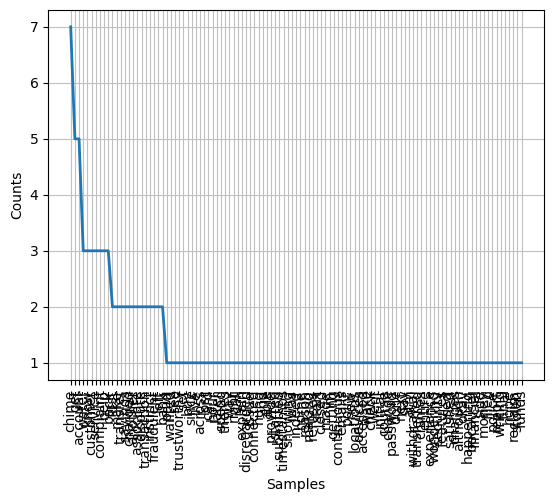

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
fdist.plot()

##### Data manipulation (combining classes)

Now that we have the baseline for text processing, we can move on to our previous question. 

Possibility 1:
We have **'issue'**, **'sub_issue'**and **'narrative'** to work with in terms of data to perform classificaiton. So we will try to combine some data, maybe even combine these feautures.

Possibility 2: Try to merge **'products'** rows, as not all of them have satisfactory amount of data. 


In [29]:
# Getting the count of each product
new_df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    514280
Debt collection                                                                 191946
Mortgage                                                                         97748
Credit card or prepaid card                                                      81787
Checking or savings account                                                      54190
Student loan                                                                     32695
Credit reporting                                                                 31588
Money transfer, virtual currency, or money service                               26556
Vehicle loan or lease                                                            19873
Credit card                                                                      18838
Bank account or service                                                          14885
Payday loan, title loan, or personal loan  

We can look to see if we can merge/remove some of the rows for the 'product' column. 

We can definite see that some of the classes/categories seem to be the same. So we will try to look and them and see if we can merge them


In [30]:
# Get the head of the dataframe where product is 'Virtual Currency'
new_df[new_df['product'] == 'Virtual currency'].head(15)

,product,sub_product,issue,sub_issue,narrative
954739,Virtual currency,Domestic (US) money transfer,Fraud or scam,NaN,Signedup XXXX family members for referrals on ...
1030892,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,"Coinbase rep, XXXX has been being an XXXX to m..."
1064669,Virtual currency,Domestic (US) money transfer,Fraud or scam,NaN,Signed up with Coinbase.com with a {$75.00} si...
1145895,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,Signed up with Coinbase.com with a {$75.00} si...
1167936,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,Two weeks ago my accounts with Coinbase were l...
1215590,Virtual currency,Domestic (US) money transfer,Fraud or scam,NaN,Signed up with Coinbase.com with a {$75.00} si...
1413537,Virtual currency,International money transfer,Fraud or scam,NaN,"Hi, on XXXX XXXX, I paid XXXX $ in XXXX to my ..."
1497255,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,I opened an online account with Coinbase to pu...
1787215,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,I first initiated a support ticket trying to r...
1795149,Virtual currency,Domestic (US) money transfer,Other service issues,NaN,Coinbase account closed without reasonable exp...


In [31]:
# Get the head of the dataframe where product is 'Money transfers, virtual currency, or money service'
new_df[new_df['product'] == 'Money transfer, virtual currency, or money service'].head(15)

,product,sub_product,issue,sub_issue,narrative
1179,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Money was not available when promised,NaN,Northern Trust Bank resigned as Trustee of my ...
4398,"Money transfer, virtual currency, or money ser...",Check cashing service,Unexpected or other fees,NaN,The company called Plastiq was supposed XXXX a...
5393,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,Under the oath I told Wells Fargo all XXXX tra...
6681,"Money transfer, virtual currency, or money ser...",Traveler's check or cashier's check,Confusing or missing disclosures,NaN,Wells Fargo are not complying with Regulation ...
7733,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Fraud or scam,NaN,"On XXXX XXXX, XXXX, I had an appointment with ..."
8074,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,NaN,I am a victim of XXXX scam. I received a text ...
8678,"Money transfer, virtual currency, or money ser...",International money transfer,Other transaction problem,NaN,"Dear Sir/Madame, At XXXX of XXXX I send the pa..."
8865,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,NaN,XX/XX/22 -- XXXX fraudulent claim was made wit...
9192,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Unauthorized transactions or other transaction...,NaN,I was a beneficiary for an account which was w...
9578,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Fraud or scam,NaN,I was involved in a scam where I lost over {$8...


In [32]:
# Get the head of the dataframe where product is 'Money transfers'
new_df[new_df['product'] == 'Money transfers'].head(15)


,product,sub_product,issue,sub_issue,narrative
52304,Money transfers,Domestic (US) money transfer,Other transaction issues,NaN,XX/XX/XXXX one of my sons asked me to pay his ...
53109,Money transfers,International money transfer,Other transaction issues,NaN,My name is XXXX and I have been doing transact...
102073,Money transfers,International money transfer,Other transaction issues,NaN,"Hi There, Thanks for the giving an opportunity..."
104315,Money transfers,International money transfer,Money was not available when promised,NaN,I did a international transfer on XX/XX/2016 o...
104382,Money transfers,Domestic (US) money transfer,Other transaction issues,NaN,On XX/XX/2016 Paypal limited my account due to...
106152,Money transfers,International money transfer,Money was not available when promised,NaN,I made a wire transfer through Citibank to XXX...
106258,Money transfers,Domestic (US) money transfer,Other transaction issues,NaN,I purchased a money order on XX/XX/2016 ( to c...
106617,Money transfers,International money transfer,Other transaction issues,NaN,Describe what happened so we can understand th...
106797,Money transfers,Domestic (US) money transfer,Fraud or scam,NaN,I received a phone call from XXXX stating that...
106829,Money transfers,Domestic (US) money transfer,Fraud or scam,NaN,I paid by bank wire transfer on XXXX/XXXX/XXXX...


Now to check for all loans.

In [33]:
# Get the head of the dataframe where product is 'Student loans'
new_df[new_df['product'] == 'Student loan'].head(15)

,product,sub_product,issue,sub_issue,narrative
5058,Student loan,Private student loan,Struggling to repay your loan,Problem lowering your monthly payments,XX/XX/2022 - Predatory lender. I contacted Sal...
10236,Student loan,Private student loan,Struggling to repay your loan,Can't temporarily delay making payments,I have been attempting to resolve issues of pa...
10432,Student loan,Private student loan,Dealing with your lender or servicer,Need information about your loan balance or lo...,I co-signed on a private student loan through ...
19643,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Keep getting calls about your loan,Hi! \nI think I was scammed. \n\nI got a call ...
20102,Student loan,Private student loan,Dealing with your lender or servicer,Trouble with how payments are being handled,Misapplication of a payment led to charge-off ...
20798,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,Ive had FFELP loans serviced by American educa...
24445,Student loan,Federal student loan servicing,Improper use of your report,Report provided to employer without your writt...,In accordance with the fair Credit Reporting a...
25107,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying ...,I have called numerous times complaining about...
26925,Student loan,Private student loan,Dealing with your lender or servicer,Problem with customer service,XXXX XXXX XXXX from Wells Fargo Enterprise Com...
27924,Student loan,Private student loan,Dealing with your lender or servicer,Received bad information about your loan,I have recently been educated about the Consum...


In [34]:
# Get the head of the dataframe where product is 'Vehicle loan or lease'
new_df[new_df['product'] == 'Vehicle loan or lease'].head(15)

,product,sub_product,issue,sub_issue,narrative
3186,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,They are calling excessively- a minimum of fiv...
3767,Vehicle loan or lease,Loan,Struggling to pay your loan,Lender trying to repossess or disable the vehicle,"XXXX caused me to get behind, Where I work eve..."
3839,Vehicle loan or lease,Loan,Managing the loan or lease,Problem with the interest rate,According to my consumer profile this alleged ...
5227,Vehicle loan or lease,Loan,Managing the loan or lease,Problem with additional products or services p...,"Hi, We are a repair facility and XXXX XXXX and..."
5458,Vehicle loan or lease,Lease,Managing the loan or lease,Problem with additional products or services p...,Date : XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXX...
6002,Vehicle loan or lease,Loan,Problems at the end of the loan or lease,Problem while selling or giving up the vehicle,The car was paid off back in XXXX and I ask th...
6938,Vehicle loan or lease,Lease,Problems at the end of the loan or lease,Termination fees or other problem when ending ...,I want to take those hard pull of my credit re...
7822,Vehicle loan or lease,Loan,Managing the loan or lease,Problem with additional products or services p...,I brought my car from XXXX XXXX XXXX in XXXX G...
8964,Vehicle loan or lease,Lease,Problems at the end of the loan or lease,Problem with paying off the loan,Leased vehicle was totaled XX/XX/2022. Vehicle...
9906,Vehicle loan or lease,Loan,Problems at the end of the loan or lease,Problem with paying off the loan,I purchased a XXXX XXXX XXXX from XXXX XXXX XX...


In [35]:
# Get the head of the dataframe where product is 'Payday loan, title loan, or personal loan'
new_df[new_df['product'] == 'Payday loan, title loan, or personal loan'].head(15)

,product,sub_product,issue,sub_issue,narrative
4729,"Payday loan, title loan, or personal loan",Payday loan,Received a loan you didn't apply for,NaN,XX/XX/XXXX - I applied for a loan online based...
7129,"Payday loan, title loan, or personal loan",Payday loan,Money was taken from your bank account on the ...,NaN,On XX/XX/22 XXXX XXXX XXXX was NOT authorized ...
7832,"Payday loan, title loan, or personal loan",Installment loan,Charged fees or interest you didn't expect,NaN,I thought this app would help they promise to ...
8948,"Payday loan, title loan, or personal loan",Title loan,Incorrect information on your report,Account information incorrect,My auto loan is showing that my payments we're...
9088,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,I am a victim of XXXX scam. I received a text ...
10518,"Payday loan, title loan, or personal loan",Payday loan,Charged fees or interest you didn't expect,NaN,Hello XXXX Case No : XXXX After receiving this...
10648,"Payday loan, title loan, or personal loan",Installment loan,Incorrect information on your report,Account status incorrect,My military loan with Omni Financial was sent ...
11377,"Payday loan, title loan, or personal loan",Installment loan,Getting the loan,NaN,"Summary : Perfect 'Bait and Switch "" Wells Far..."
11520,"Payday loan, title loan, or personal loan",Installment loan,Problem when making payments,NaN,I am having an ongoing issue with my payment s...
12591,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,NaN,Back in XX/XX/2022 I got XXXX XXXX I behind in...


All these three look to be the same or at least similar. So we can safely merge these three categeories and since 'virtual currencies' has very low data, it is better to merge it anyways.


In [36]:
new_df['product'].replace({'Virtual currency':'Money_and_virtual_transfers_and_services',
'Money transfer, virtual currency, or money service':'Money_and_virtual_transfers_and_services',
 'Money transfers': 'Money_and_virtual_transfers_and_services'}, inplace=True)

In [37]:
new_df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    514280
Debt collection                                                                 191946
Mortgage                                                                         97748
Credit card or prepaid card                                                      81787
Checking or savings account                                                      54190
Student loan                                                                     32695
Credit reporting                                                                 31588
Money_and_virtual_transfers_and_services                                         28069
Vehicle loan or lease                                                            19873
Credit card                                                                      18838
Bank account or service                                                          14885
Payday loan, title loan, or personal loan  

We can safely merge the loans as there is not a lot of data in some of the 'xxxxx_loan' categeories. This would help in classifying as we combined and have more data for the 'loan' category.

In [38]:
new_df['product'].replace({'Student loan':'loans',
'Vehicle loan or lease':'loans',
 'Payday loan, title loan, or personal loan': 'loans',
 'Consumer Loan':'loans',
 'Payday loan':'loans',}, inplace=True)

In [39]:
new_df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    514280
Debt collection                                                                 191946
Mortgage                                                                         97748
Credit card or prepaid card                                                      81787
loans                                                                            77347
Checking or savings account                                                      54190
Credit reporting                                                                 31588
Money_and_virtual_transfers_and_services                                         28069
Credit card                                                                      18838
Bank account or service                                                          14885
Prepaid card                                                                      1450
Other financial service                    

Similarly, we can merge all similar to credit reporting ('Credit reporting, credit repair services, or other personal consumer reports' and 'Credit Reporting')

In [40]:
new_df['product'].replace({'Credit reporting, credit repair services, or other personal consumer reports':'credit_reporting_and_services',
'Credit reporting':'credit_reporting_and_services'}, inplace=True)
new_df['product'].value_counts()

credit_reporting_and_services               545868
Debt collection                             191946
Mortgage                                     97748
Credit card or prepaid card                  81787
loans                                        77347
Checking or savings account                  54190
Money_and_virtual_transfers_and_services     28069
Credit card                                  18838
Bank account or service                      14885
Prepaid card                                  1450
Other financial service                        292
Name: product, dtype: int64

Trying to figure out what 'Other financial service' are about...

In [41]:
# Get the head of the dataframe where product is 'Other financial service'
new_df[new_df['product'] == 'Other financial service'].head(15)

,product,sub_product,issue,sub_issue,narrative
98954,Other financial service,Debt settlement,Fraud or scam,NaN,i hired Pay map company to collect my mortgage...
115764,Other financial service,Credit repair,Fraud or scam,NaN,Since using the service it appears my credit i...
131541,Other financial service,Debt settlement,Fraud or scam,NaN,A company by the name of student loan relief d...
135664,Other financial service,Check cashing,Customer service/Customer relations,NaN,Certegy XXXX XXXX has a file of my name and an...
136603,Other financial service,Debt settlement,Customer service/Customer relations,NaN,"HELLO, Re : Account # XXXX I have called asked..."
136785,Other financial service,Foreign currency exchange,Customer service/Customer relations,NaN,I am submitting a complaint in regards to a ba...
142385,Other financial service,Money order,Unexpected/Other fees,NaN,I purchased a WU Money Order for {$75.00} to m...
157977,Other financial service,Debt settlement,Disclosures,NaN,Contract is misleading advising you can get a ...
403743,Other financial service,Check cashing,Unexpected/Other fees,NaN,"Dear CFPB, I contacted Bank of America to clos..."
602776,Other financial service,Money order,Fraud or scam,NaN,"On XXXX/XXXX/16, I purchased XXXX moneygram mo..."


Since the columns 'Other financial service', 'Bank account or service', 'Checking or savings account' seem to bew similar, we will merge them

In [42]:
new_df['product'].replace({'Other financial service':'banking_services',
'Bank account or service':'banking_services',
'Checking or savings account':'banking_services',}, inplace=True)
new_df['product'].value_counts()

credit_reporting_and_services               545868
Debt collection                             191946
Mortgage                                     97748
Credit card or prepaid card                  81787
loans                                        77347
banking_services                             69367
Money_and_virtual_transfers_and_services     28069
Credit card                                  18838
Prepaid card                                  1450
Name: product, dtype: int64

Since the columns 'Prepaid card', 'Credit card', 'Credit card or prepaid card' seem to bew similar, we will merge them

In [43]:
new_df['product'].replace({'Prepaid card':'credit_card_or_prepaid_card',
'Credit card':'credit_card_or_prepaid_card',
'Credit card or prepaid card':'credit_card_or_prepaid_card'}, inplace=True)
new_df['product'].value_counts()

credit_reporting_and_services               545868
Debt collection                             191946
credit_card_or_prepaid_card                 102075
Mortgage                                     97748
loans                                        77347
banking_services                             69367
Money_and_virtual_transfers_and_services     28069
Name: product, dtype: int64

In [44]:
new_df['product'].replace({'Debt collection':'debt_collection'}, inplace=True)
new_df['product'].value_counts()

credit_reporting_and_services               545868
debt_collection                             191946
credit_card_or_prepaid_card                 102075
Mortgage                                     97748
loans                                        77347
banking_services                             69367
Money_and_virtual_transfers_and_services     28069
Name: product, dtype: int64

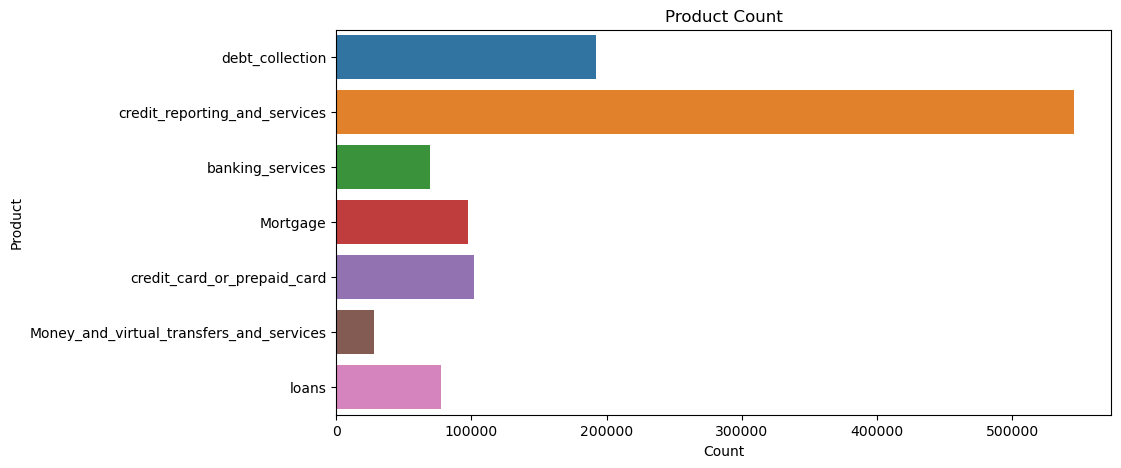

In [45]:
plotCountPlot(new_df, 'product', 'Product Count', 'Count', 'Product', invert=True)

Data still seems to be imbalanced, but certainly better than before. Maybe I can try to marge more 'product' categories to be able to get decent data for classification.

In [46]:
# Get the head of the dataframe where product is 'Mortgage'
new_df[new_df['product'] == 'Mortgage'].head(15)

,product,sub_product,issue,sub_issue,narrative
308,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,Ditech/ShellpointXXXX XXXX XXXX XXXX worked to...
450,Mortgage,VA mortgage,Applying for a mortgage or refinancing an exis...,NaN,I applied for a VA XXXX loan with New day USA....
745,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,I have fully paid up my mortgage dues and Sele...
2059,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,"Mortgage transfer from XXXX XXXX to Truist, ..."
2220,Mortgage,FHA mortgage,Applying for a mortgage or refinancing an exis...,NaN,Approved for a fha loan paid earnest money hom...
2417,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,They have refused a check from the state HAF p...
3267,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,In XXXX I received a notice that our property ...
3583,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,"Defaulted on loan, worked with mortgage compan..."
3588,Mortgage,FHA mortgage,Trouble during payment process,NaN,My mortgage payments are currently being proce...
3613,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,Cfpb disappointed in your level of service & s...


In [47]:
# Get the head of the dataframe where product is 'loans'
new_df[new_df['product'] == 'loans'].head(15)

,product,sub_product,issue,sub_issue,narrative
3186,loans,Loan,Struggling to pay your loan,Denied request to lower payments,They are calling excessively- a minimum of fiv...
3767,loans,Loan,Struggling to pay your loan,Lender trying to repossess or disable the vehicle,"XXXX caused me to get behind, Where I work eve..."
3839,loans,Loan,Managing the loan or lease,Problem with the interest rate,According to my consumer profile this alleged ...
4729,loans,Payday loan,Received a loan you didn't apply for,NaN,XX/XX/XXXX - I applied for a loan online based...
5058,loans,Private student loan,Struggling to repay your loan,Problem lowering your monthly payments,XX/XX/2022 - Predatory lender. I contacted Sal...
5227,loans,Loan,Managing the loan or lease,Problem with additional products or services p...,"Hi, We are a repair facility and XXXX XXXX and..."
5458,loans,Lease,Managing the loan or lease,Problem with additional products or services p...,Date : XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXX...
6002,loans,Loan,Problems at the end of the loan or lease,Problem while selling or giving up the vehicle,The car was paid off back in XXXX and I ask th...
6938,loans,Lease,Problems at the end of the loan or lease,Termination fees or other problem when ending ...,I want to take those hard pull of my credit re...
7129,loans,Payday loan,Money was taken from your bank account on the ...,NaN,On XX/XX/22 XXXX XXXX XXXX was NOT authorized ...


The categories 'loan' and 'mortgage' seem to be similar, but they are different enough to have their own categories. So, will not be merging them.


But we can see that 'Money_and_virtual_transfers_and_services' has quite a low count, which would cause problems for training for classification. So it would be appropriate to merge them into 'banking_services'


In [48]:
new_df['product'].replace({'Money_and_virtual_transfers_and_services':'banking_services_and_transfers',
'banking_services':'banking_services_and_transfers'}, inplace=True)
new_df['product'].value_counts()

credit_reporting_and_services     545868
debt_collection                   191946
credit_card_or_prepaid_card       102075
Mortgage                           97748
banking_services_and_transfers     97436
loans                              77347
Name: product, dtype: int64

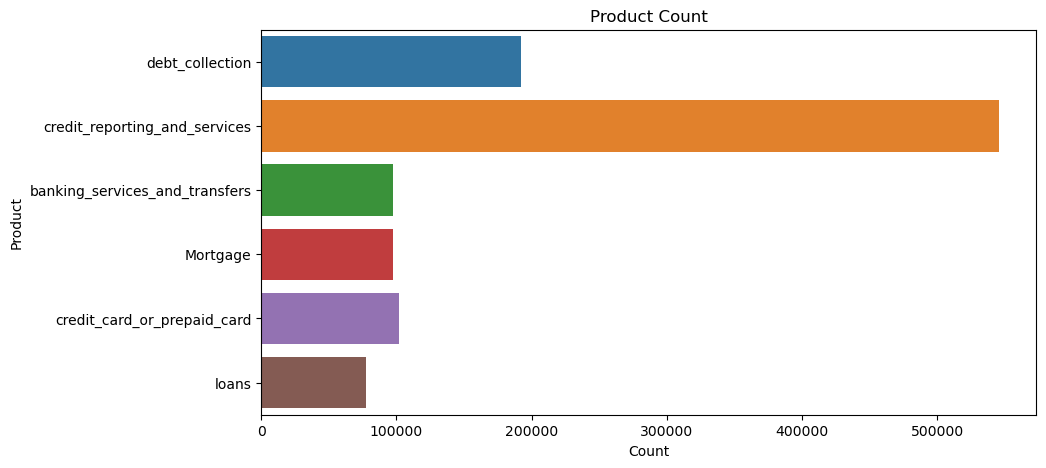

In [49]:
plotCountPlot(new_df, 'product', 'Product Count', 'Count', 'Product', invert=True)

We can see that the new data is more appropriate for classification problem because the mimimum count for a 'product' category is around 77000 and for data with more than a million entries, that is relatively enough for a classification problem, at least better than the 'product' classes  with close to 700 counts that we had before. 

So, at least at this point, we can assume that we have enough data to learn.

In [50]:
# Get the head 
new_df.head(15)

,product,sub_product,issue,sub_issue,narrative
38,debt_collection,Other debt,Attempts to collect debt not owed,Debt was paid,XXXX. I do not owe any money to XXXX XXXX. I ...
39,debt_collection,Other debt,False statements or representation,Indicated you were committing crime by not pay...,XXXX is attempting to collect funds for Valuat...
41,credit_reporting_and_services,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,EXPERIAN I didnt consent to these Inquiries Al...
68,banking_services_and_transfers,Savings account,Managing an account,Deposits and withdrawals,Citibank froze my account that contained {$200...
129,credit_reporting_and_services,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the fair credit reporting a...
137,banking_services_and_transfers,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,I had a checking account in this bank for over...
149,credit_reporting_and_services,Credit reporting,Incorrect information on your report,Information belongs to someone else,This is not a duplicate nor is this complaint ...
150,credit_reporting_and_services,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,It has come to my attention. That my personal ...
156,credit_reporting_and_services,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,The Federal Trade Commission Bureau of Consume...
157,credit_reporting_and_services,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The following creditors, XXXX XXXXXXXX XXXX, a..."


In [52]:
# Writing the data to csv file
new_df.to_csv('cleaned_complaints.csv', index=False)